<a href="https://colab.research.google.com/github/YounSooKimTech/Bamboo_Project/blob/main/BambooCeilingFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [192]:
import pandas as pd

df_race = pd.read_csv('/content/ceo_ethnicity_original_n_predictedd.csv')

df_race

,dirid,first,last,fullname,female,ethnicity,ethnicity_recode,names,predictions,confidences,predictions_recode,predictions_recode_strict
0,1.0,james,preston,JAMES E PRESTON,0.0,C,White,JAMES E PRESTON,Celtic,92.858,White,White
1,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN,Unknown,CHARLES D MILLER,Celtic,62.297,White,Unknown
2,3.0,philip,neal,PHILIP M NEAL,0.0,C,White,PHILIP M NEAL,Celtic,91.714,White,White
3,4.0,peter,mullin,PETER W MULLIN,NaN,U,Unknown,PETER W MULLIN,Celtic,81.520,White,White
4,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN,White,RICHARD M FERRY,Celtic,76.842,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...
36788,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN,White,KRISTEN O'HARA,African,76.683,Black,Black
36789,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN,White,KENNETH SLUTSKY,Nordic,83.006,White,White
36790,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN,White,LINDA YACCARINO,Celtic,65.279,White,Unknown
36791,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN,White,GERALD CHIZEVER,African,88.068,Black,Black


In [193]:

df_race["fullname_clean"] = df_race["fullname"].str.strip().str.upper()
df_race["fullname_clean"] = df_race["fullname_clean"].str.replace('.', '').str.replace(",", "").str.replace("'", "")

df_race['fullname_clean'].value_counts()

,count
fullname_clean,
JOHN E MAUPIN JR,3
JAMES S HAINES JR,3
WARREN A HOOD JR,3
C RAYMOND LARKIN JR,2
JAMES W CROWNOVER,2
...,...
NORMAN STOUT,1
WILFRED W YEARGAN,1
ALAN Z SENTER,1


In [194]:
# drop duplicates

df_race = df_race.drop_duplicates(subset='fullname_clean', keep='first')

df_race['fullname_clean'].value_counts()

,count
fullname_clean,
JAMES E PRESTON,1
TIMOTHY F PRICE,1
MICHAEL C MEWHINNEY,1
DONALD R VOELTE JR,1
LAWRENCE FRIEDLAND,1
...,...
GARY C YOUNGBLOOD,1
JANE A TRUELOVE,1
JAMES K JENNINGS JR,1


# female information

In [195]:
df_race[["female"]].value_counts(dropna=False)


,count
female,
NaN,18649
0.0,15857
1.0,1359


<ipython-input-196-101dc5aec554>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['gender'] = df_race['female'].map({1.0: 'Female', 0.0: 'Male', None: 'NaN'})


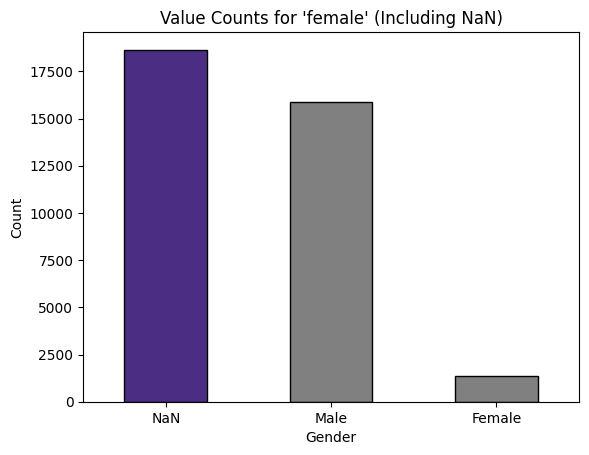

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

husky_purple = '#4B2E83'

# Creating a new 'gender' column based on the 'female' column
df_race['gender'] = df_race['female'].map({1.0: 'Female', 0.0: 'Male', None: 'NaN'})

# Count
value_counts_female = df_race["gender"].value_counts(dropna=False)

# Colors
colors = ['grey' if label != 'NaN' else husky_purple for label in value_counts_female.index]

# Adjusting the code to work with the available data
value_counts_female.plot(kind='bar', color=colors, edgecolor='black')

plt.title("Value Counts for 'female' (Including NaN)")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(ticks=range(len(value_counts_female.index)), labels=value_counts_female.index, rotation=0)
plt.show()


In [197]:
! pip install gender-guesser
! pip install genderize

In [198]:
import gender_guesser.detector as gender

# Initialize the detector
d = gender.Detector()

# Add a new column with gender predictions
df_race['Predicted_Gender'] = df_race['first'].str.capitalize().apply(d.get_gender)

df_race["Predicted_Gender"].value_counts()


<ipython-input-198-1b560708ec03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['Predicted_Gender'] = df_race['first'].str.capitalize().apply(d.get_gender)


,count
Predicted_Gender,
male,29652
female,3233
unknown,1670
mostly_male,692
mostly_female,485
andy,133


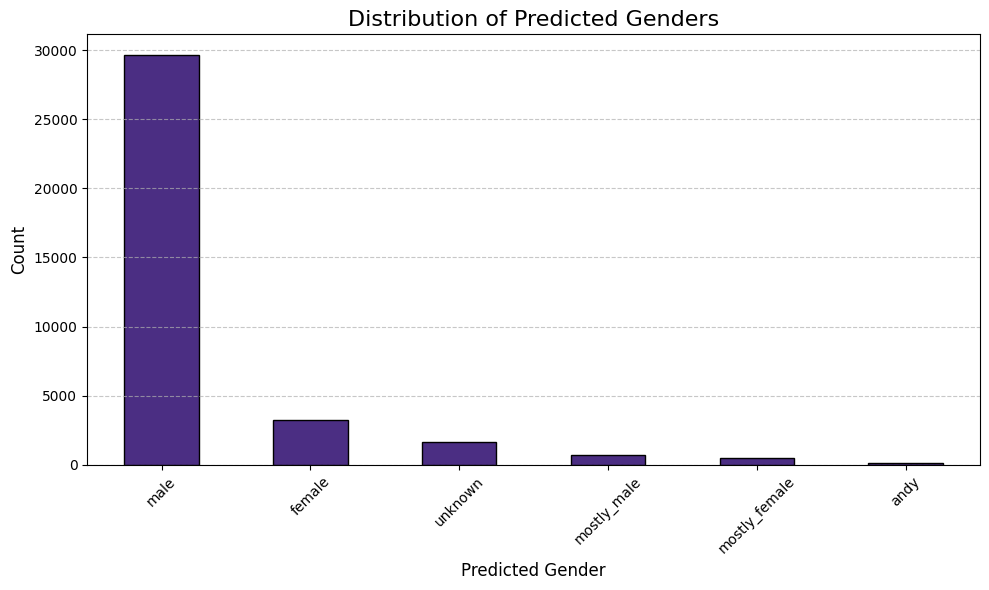

In [199]:
import matplotlib.pyplot as plt

# Calculate value counts for Predicted_Gender
gender_counts = df_race["Predicted_Gender"].value_counts()

# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=husky_purple, edgecolor='black')

# Add titles and labels
plt.title("Distribution of Predicted Genders", fontsize=16)
plt.xlabel("Predicted Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [200]:
gender_mapping = {
    'male': 'Male',
    'mostly_male': 'Male',
    'female': 'Female',
    'mostly_female': 'Female',
    'unknown': 'Unknown',
    'andy': 'Unknown'  # Assuming 'andy' falls under 'unknown'
}

# Apply the mapping to recode Predicted_Gender
df_race['Predicted_Gender_B'] = df_race['Predicted_Gender'].replace(gender_mapping)

# Verify the recoding
print(df_race['Predicted_Gender_B'].value_counts())

Predicted_Gender_B
Male       30344
Female      3718
Unknown     1803
Name: count, dtype: int64


<ipython-input-200-574bf4cea8ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['Predicted_Gender_B'] = df_race['Predicted_Gender'].replace(gender_mapping)


In [201]:
pivot_table = pd.crosstab(df_race['gender'], df_race['Predicted_Gender_B'])

pivot_table

Predicted_Gender_B,Female,Male,Unknown
gender,,,
Female,1199,51,109
Male,186,14902,769
NaN,2333,15391,925


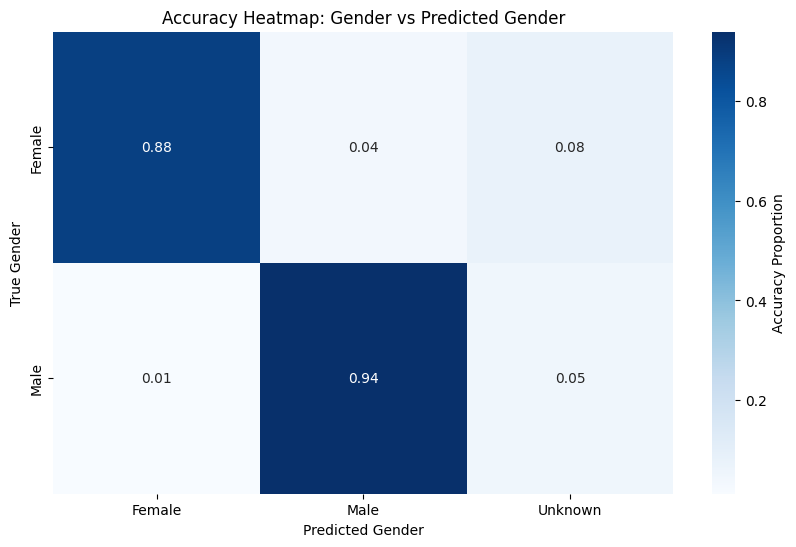

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = df_race[df_race["gender"].isin(["Female", "Male"])]

# Create a pivot table (cross-tabulation)
pivot_table = pd.crosstab(df_temp['gender'], df_temp['Predicted_Gender_B'])

# Normalize the table by rows to get proportions
accuracy_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot a heatmap for accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_table, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Accuracy Proportion'})
plt.title("Accuracy Heatmap: Gender vs Predicted Gender")
plt.xlabel("Predicted Gender")
plt.ylabel("True Gender")
plt.show()


In [203]:
# Calculate the number of correct predictions
correct_predictions = (df_temp['gender'] == df_temp['Predicted_Gender_B']).sum()

# Calculate the total number of predictions
total_predictions = len(df_temp)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Print accuracy
print(f"Accuracy of the pretrained model: {accuracy:.2%}")


Accuracy of the pretrained model: 93.52%


# Ethnicity Information

In [204]:
df_race['ethnicity_recode'].value_counts()

,count
ethnicity_recode,
Unknown,17715
White,16439
Black,778
Asian,493
Hispanic,330
Indian,63
MiddleEastern,31
Others,16


In [205]:
df_race["fullname"].value_counts()

,count
fullname,
JAMES E PRESTON,1
TIMOTHY F PRICE,1
MICHAEL C MEWHINNEY,1
DONALD R VOELTE JR,1
LAWRENCE FRIEDLAND,1
...,...
GARY C. YOUNGBLOOD,1
JANE A TRUELOVE,1
JAMES K JENNINGS JR,1


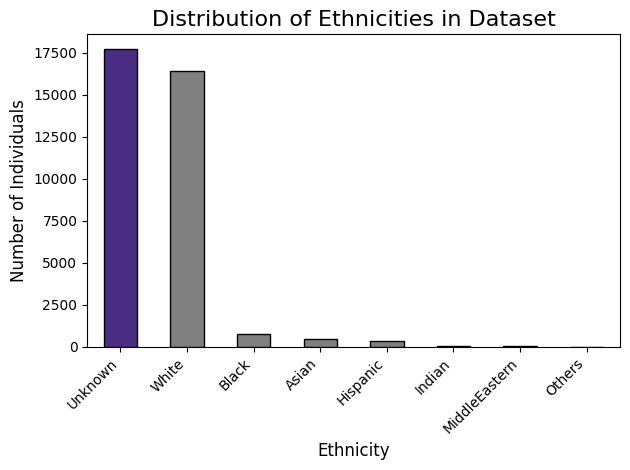

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color for highlighting 'Unknown'
husky_purple = '#4B2E83'

# Count values in the 'ethnicity_recode' column
value_counts_ethnicity = df_race["ethnicity_recode"].value_counts(dropna=False)

# Define colors: highlight 'Unknown', use grey for others
colors = ['grey' if label != 'Unknown' else husky_purple for label in value_counts_ethnicity.index]

# Plot the value counts as a bar chart
value_counts_ethnicity.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title with improved wording
plt.title("Distribution of Ethnicities in Dataset", fontsize=16)
plt.ylabel("Number of Individuals", fontsize=12)
plt.xlabel("Ethnicity", fontsize=12)

# Rotate x-axis labels to 45 degrees for readability
plt.xticks(ticks=range(len(value_counts_ethnicity.index)),
           labels=value_counts_ethnicity.index,
           rotation=45,
           ha='right',
           fontsize=10)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


In [207]:
df_race[["ethnicity_recode", "predictions_recode"]]

,ethnicity_recode,predictions_recode
0,White,White
1,Unknown,White
2,White,White
3,Unknown,White
4,White,White
...,...,...
36788,White,Black
36789,White,White
36790,White,White
36791,White,Black


In [208]:
def determine_final_ethnicity(row):
    if row['ethnicity_recode'] in ['Unknown', 'Others']:
        return row['predictions_recode']
    return row['ethnicity_recode']

df_race['final_ethnicity'] = df_race.apply(determine_final_ethnicity, axis=1)

df_race[["ethnicity_recode", "predictions_recode", 'final_ethnicity']]

<ipython-input-208-9a00c94e9d30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['final_ethnicity'] = df_race.apply(determine_final_ethnicity, axis=1)


,ethnicity_recode,predictions_recode,final_ethnicity
0,White,White,White
1,Unknown,White,White
2,White,White,White
3,Unknown,White,White
4,White,White,White
...,...,...,...
36788,White,Black,White
36789,White,White,White
36790,White,White,White
36791,White,Black,White


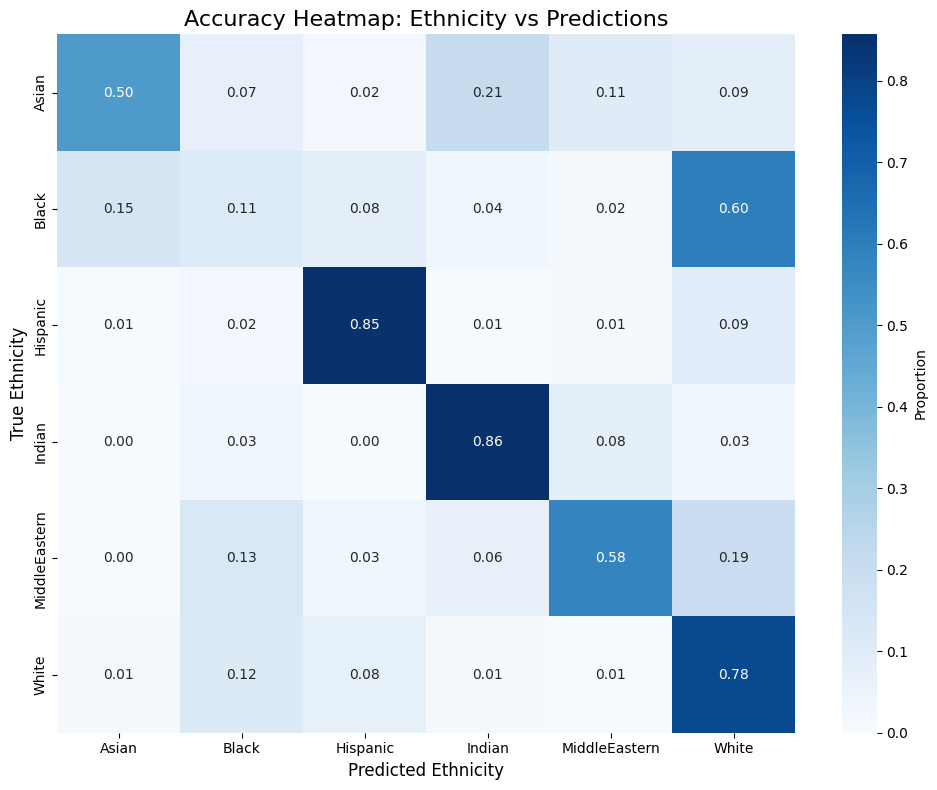

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = df_race[~df_race["ethnicity_recode"].isin(["Unknown", "Others"])]
#df_temp = df_temp[df_temp["predictions_recode"].isin(["White", "Black", "Hispanic", "Asian", "Indian"])]


# Create a crosstab to compare actual and predicted values
crosstab = pd.crosstab(df_temp["ethnicity_recode"], df_temp["predictions_recode"])

# Normalize the crosstab by rows to calculate accuracy proportions
accuracy_matrix = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Proportion'})

# Add labels and title
plt.title("Accuracy Heatmap: Ethnicity vs Predictions", fontsize=16)
plt.xlabel("Predicted Ethnicity", fontsize=12)
plt.ylabel("True Ethnicity", fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()

In [210]:
df_race["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Unknown,17715
White,16439
Black,778
Asian,493
Hispanic,330
Indian,63
MiddleEastern,31
Others,16


In [211]:
# Count the number of correct predictions
df_temp = df_race[~df_race["ethnicity_recode"].isin(["Unknown"])]

correct_predictions = (df_temp["ethnicity_recode"] == df_temp["predictions_recode"]).sum()

# Calculate the total number of predictions
total_predictions = len(df_race)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Print the general accuracy
print(f"General Accuracy of the Model: {accuracy:.2%}")


General Accuracy of the Model: 37.50%


# Whole Dataset

In [240]:
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt

df_pay = pd.read_stata('/content/Updated CEO pay sample.dta')

df_pay

,exec_fullname,co_per_rol,coname_execucomp,titleann,total_sec,total_curr,total_alt1,total_alt2,shrown_excl_opts,shrown_excl_opts_pct,...,yeardummy13,yeardummy14,yeardummy15,yeardummy16,yeardummy17,yeardummy18,yeardummy19,yeardummy20,yeardummy21,yeardummy22
0,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,13.000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,6.500,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,995.000,NaN,NaN,49.070,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1340.900,NaN,NaN,61.000,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1601.250,NaN,NaN,128.500,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40238,"Arthur P. Bedrosian, J.D.",49486,LANNETT CO INC,"Chief Executive Officer, President, Director, ...",439.319,416.763,439.319,439.319,601.648,2.121,...,0,0,0,0,0,0,0,1,0,0
40239,"Arthur P. Bedrosian, J.D.",49486,LANNETT CO INC,"Chief Executive Officer, President, Director, ...",838.111,425.096,838.111,709.096,631.061,2.229,...,0,0,0,0,0,0,0,0,1,0
40240,"Arthur P. Bedrosian, J.D.",49486,LANNETT CO INC,"Chief Executive Officer, President, Director, ...",1264.994,437.513,1264.994,1164.184,669.359,2.203,...,0,0,0,0,0,0,0,0,0,1
40241,Vikram Verma,49504,8X8 INC,Chief Executive Officer and Director,4655.271,224.359,4655.271,1425.154,171.203,0.193,...,0,0,0,0,0,0,0,0,0,1


In [241]:
# Clean the name

df_pay["exec_fullname_clean"] = df_pay["exec_fullname"].str.strip().str.upper()
df_pay["exec_fullname_clean"] = df_pay["exec_fullname_clean"].str.replace('.', '').str.replace(",", "").str.replace("'", "")



<ipython-input-241-3daa39c9cf2c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pay["exec_fullname_clean"] = df_pay["exec_fullname"].str.strip().str.upper()


In [242]:
df_total = pd.merge(df_pay, df_race, left_on='exec_fullname_clean', right_on='fullname_clean', how='inner')

df_total

,exec_fullname,co_per_rol,coname_execucomp,titleann,total_sec,total_curr,total_alt1,total_alt2,shrown_excl_opts,shrown_excl_opts_pct,...,names,predictions,confidences,predictions_recode,predictions_recode_strict,fullname_clean,gender,Predicted_Gender,Predicted_Gender_B,final_ethnicity
0,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,13.000,NaN,...,ROBERT L CRANDALL,Celtic,84.313,White,White,ROBERT L CRANDALL,Male,male,Male,White
1,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,6.500,NaN,...,ROBERT L CRANDALL,Celtic,84.313,White,White,ROBERT L CRANDALL,Male,male,Male,White
2,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,995.000,NaN,NaN,49.070,NaN,...,ROBERT L CRANDALL,Celtic,84.313,White,White,ROBERT L CRANDALL,Male,male,Male,White
3,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1340.900,NaN,NaN,61.000,NaN,...,ROBERT L CRANDALL,Celtic,84.313,White,White,ROBERT L CRANDALL,Male,male,Male,White
4,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1601.250,NaN,NaN,128.500,NaN,...,ROBERT L CRANDALL,Celtic,84.313,White,White,ROBERT L CRANDALL,Male,male,Male,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",16254.271,700.000,16254.271,45299.742,0.000,0.000,...,HOCK E TAN,EastAsian,55.420,Asian,Unknown,HOCK E TAN,NaN,unknown,Unknown,Asian
31207,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",753.040,716.346,753.040,753.040,0.000,0.000,...,HOCK E TAN,EastAsian,55.420,Asian,Unknown,HOCK E TAN,NaN,unknown,Unknown,Asian
31208,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",31867.129,781.731,31867.129,20620.097,214.774,0.085,...,HOCK E TAN,EastAsian,55.420,Asian,Unknown,HOCK E TAN,NaN,unknown,Unknown,Asian
31209,Vikram Verma,49504,8X8 INC,Chief Executive Officer and Director,4655.271,224.359,4655.271,1425.154,171.203,0.193,...,VIKRAM VERMA,SouthAsian,97.447,Indian,Indian,VIKRAM VERMA,NaN,male,Male,Indian


In [243]:
print(df_race.shape)
print(df_pay.shape)
print(df_total.shape)

(35865, 17)
(40243, 373)
(31211, 390)


In [244]:
df_total["fyear"].value_counts().sort_index()

,count
fyear,
1992,995
1993,1178
1994,1312
1995,1456
1996,1587
1997,1655
1998,1687
1999,1618
2000,1544


In [245]:
df_total['exec_fullname'].value_counts().sort_index()

,count
exec_fullname,
A. Blaine Bowman,11
A. Dano Davis,8
A. Drue Jennings,9
A. E. Benton,8
A. Earl Swift,4
...,...
Winslow H. Buxton,9
Winston W. Walker,2
Wolfgang R. Schmitt,6


In [246]:
df_total['gvkey'].value_counts().sort_index()

,count
gvkey,
1004,21
1013,19
1034,7
1045,17
1055,4
...,...
264708,3
274165,2
287462,3


In [247]:
df_total.describe()

,co_per_rol,total_sec,total_curr,total_alt1,total_alt2,shrown_excl_opts,shrown_excl_opts_pct,ceoage,execrankann,ltip,...,yeardummy16,yeardummy17,yeardummy18,yeardummy19,yeardummy20,yeardummy21,yeardummy22,dirid,female,confidences
count,31211.000000,10520.000000,31211.000000,10478.000000,1.045900e+04,2.974600e+04,18330.000000,31136.000000,28414.000000,31211.000000,...,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,31211.000000,16400.00000,31211.000000
mean,16258.625292,5949.017888,1183.363737,5965.120959,7.497778e+03,2.633102e+03,3.981033,55.739048,1.248012,114.385179,...,0.047323,0.045945,0.044856,0.043606,0.041620,0.039633,0.035853,30022.079043,0.01122,71.582817
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,24.000000,1.000000,-2360.925000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,21.033000
25%,5719.000000,1943.105750,550.000000,1896.644000,1.576678e+03,7.833375e+01,0.279000,51.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4909.500000,0.00000,58.134000
50%,14318.000000,3936.960000,848.150000,3898.071500,3.349070e+03,2.377000e+02,0.938500,56.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16368.000000,0.00000,75.504000
75%,24532.000000,7572.596750,1287.194000,7552.601500,7.482704e+03,7.995062e+02,3.300000,61.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38898.000000,0.00000,86.503000
max,49506.000000,137166.545000,102448.766000,137206.818000,3.300331e+06,2.424000e+06,100.000000,97.000000,9.000000,38705.648000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,217323.000000,1.00000,99.917000
std,12345.452362,6904.785514,1692.033259,7105.403740,4.254200e+04,3.181203e+04,7.849742,7.551429,0.813458,795.485680,...,0.212332,0.209370,0.206991,0.204221,0.199722,0.195100,0.185926,38517.419548,0.10533,18.166445


In [248]:
df_total[["ceoage", "ceotenure", "sale", "lnsale", "emp", "tsr", "roa", "total_sec"]]

,ceoage,ceotenure,sale,lnsale,emp,tsr,roa,total_sec
0,57.0,7.819672,22378.955078,10.015876,119.300,-4.255318,-2.539292,NaN
1,58.0,8.816940,23698.187500,10.073153,118.900,-0.740735,-0.496740,NaN
2,59.0,9.814208,23748.177734,10.075261,109.800,-20.522388,1.170071,NaN
3,60.0,10.811476,24199.943359,10.094106,110.000,39.436604,1.002250,NaN
4,61.0,11.811476,24677.689453,10.113655,111.300,18.686878,5.391033,NaN
...,...,...,...,...,...,...,...,...
31206,59.0,5.655738,2265.369629,7.725493,3.500,38.309822,22.567457,16254.271
31207,60.0,6.655738,2245.593994,7.716725,3.600,-0.591118,19.671558,753.040
31208,61.0,7.653006,2358.849854,7.765929,4.800,40.539539,16.163982,31867.129
31209,49.0,0.554645,120.373421,4.790599,0.484,57.810223,0.534086,4655.271


In [249]:
# natural log
import numpy as np

# Create a new column 'lnemp' in the dataframe by taking the natural logarithm of 'emp'
df_total['lnemp'] = np.log(df_total['emp'].replace(0, np.nan))
df_total['lnsale'] = np.log(df_total['sale'].replace(0, np.nan))
df_total['lncompanyage'] = np.log(df_total['companyage'].replace(0, np.nan))
df_total['lncashpay'] = np.log(df_total['cashpay'].replace(0, np.nan))
df_total['lnnoncashpay'] = np.log(df_total['noncashpay'].replace(0, np.nan))


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


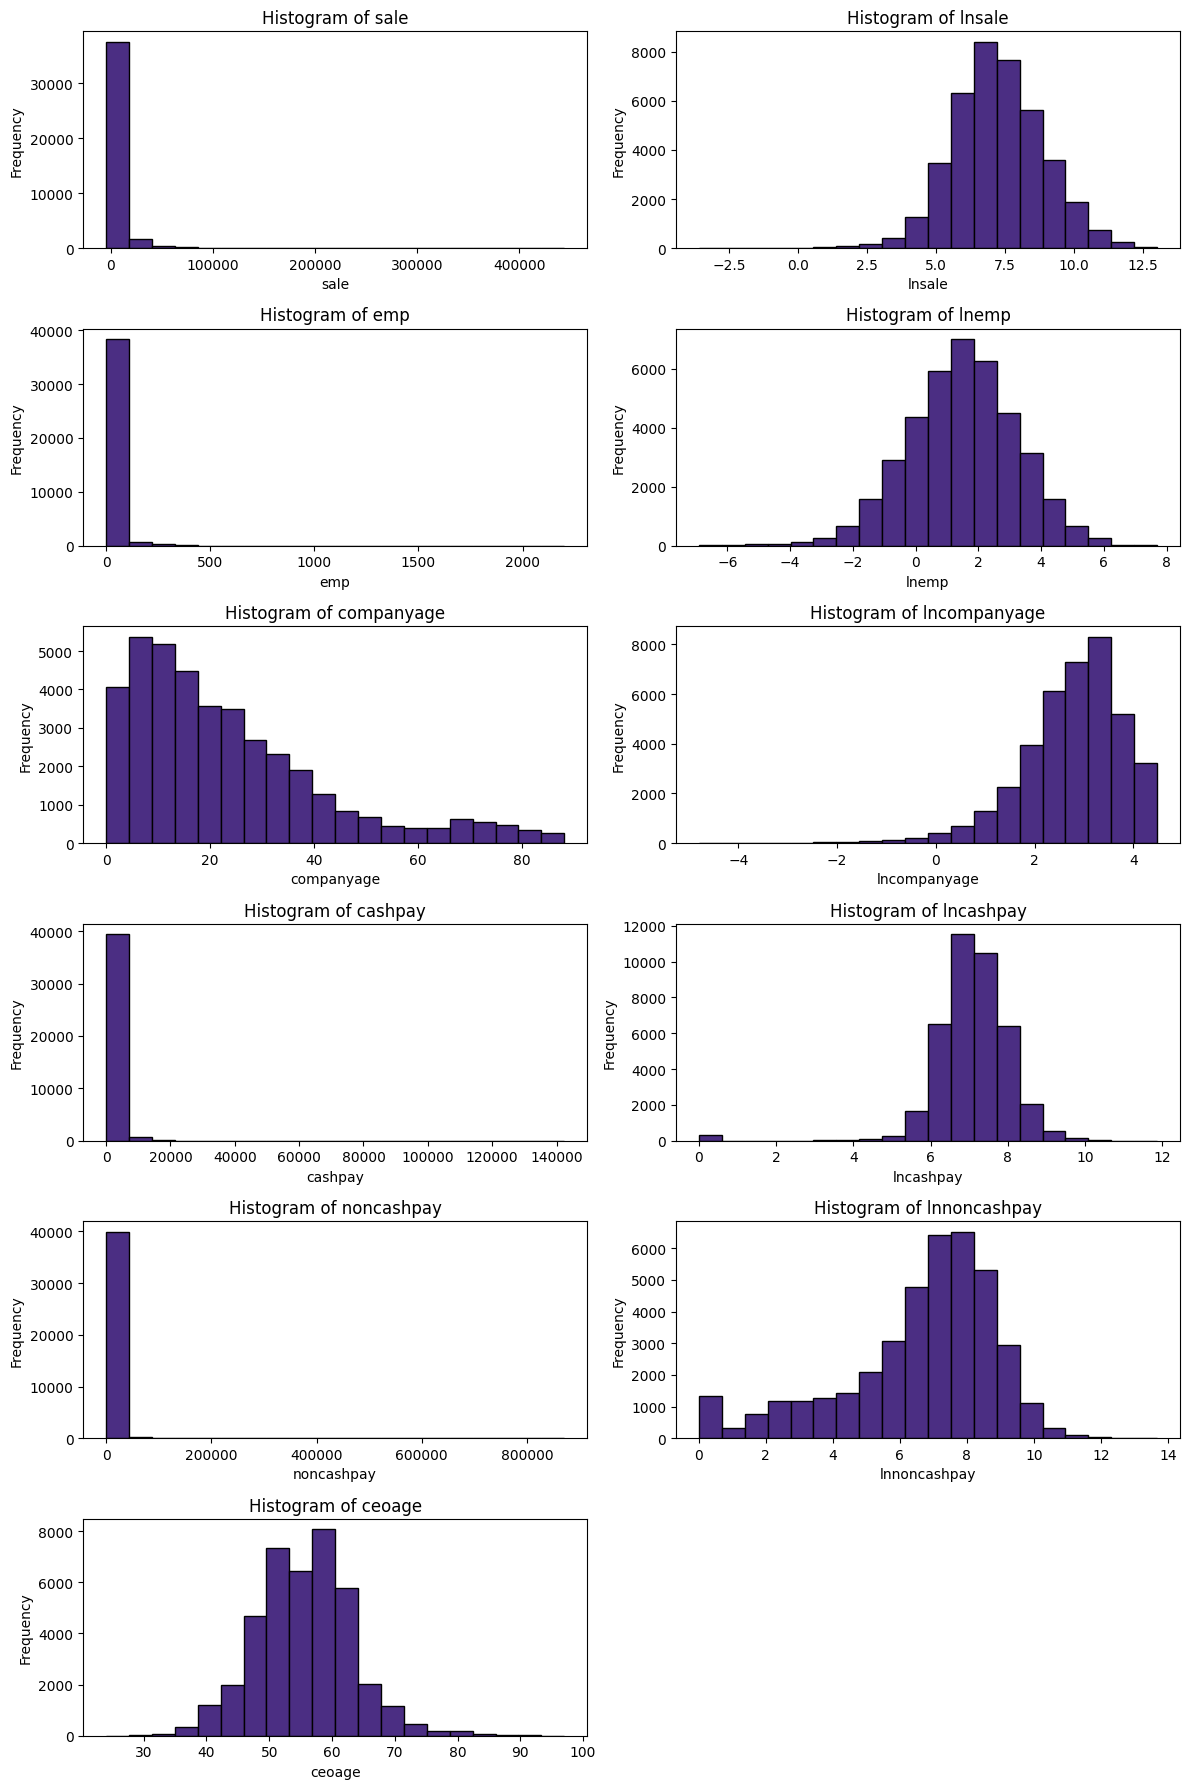

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

husky_purple = '#4B2E83'

# Define the variables to plot
columns = ["sale", "lnsale", "emp", "lnemp", "companyage", "lncompanyage", "cashpay", "lncashpay", "noncashpay", "lnnoncashpay", "ceoage"]

# Define the number of rows and columns
ncols = 2
nrows = -(-len(columns) // ncols)  # Ceiling division for the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 18))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column
for i, column in enumerate(columns):
    if column in df_pay.columns:
        df_pay[column].plot(
            kind='hist', bins=20, ax=axes[i], title=f"Histogram of {column}",
            edgecolor='black', color=husky_purple
        )
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].axis("off")  # Turn off unused axes for missing columns

# Turn off any remaining unused subplots
for j in range(len(columns), len(axes)):
    axes[j].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()


In [251]:
# Winsorization

from scipy.stats.mstats import winsorize

# Define thresholds for winsorization (e.g., cap at the 1st and 99th percentiles)
lower_bound = 0.05
upper_bound = 0.95

# Winsorize 'tsr' and 'roa'
df_total['w_tsr'] = winsorize(df_total['tsr'], limits=(lower_bound, 1 - upper_bound))
df_total['w_roa'] = winsorize(df_total['roa'], limits=(lower_bound, 1 - upper_bound))
df_total['w_total_sec'] = winsorize(df_total['total_sec'], limits=(lower_bound, 1 - upper_bound))
df_total['w_cashpay'] = winsorize(df_total['cashpay'], limits=(lower_bound, 1 - upper_bound))
df_total['w_noncashpay'] = winsorize(df_total['noncashpay'], limits=(lower_bound, 1 - upper_bound))


df_total[['tsr', 'w_tsr', 'roa', 'w_roa', 'total_sec', 'w_total_sec', 'cashpay', 'w_cashpay', 'noncashpay', 'w_noncashpay']].describe()

,tsr,w_tsr,roa,w_roa,total_sec,w_total_sec,cashpay,w_cashpay,noncashpay,w_noncashpay
count,30454.000000,31211.000000,31182.000000,31211.000000,10520.000000,10520.000000,31211.000000,31211.000000,31154.000000,31211.000000
mean,62.588146,20.196064,3.311122,4.385059,5949.017888,6021.915737,1787.632812,1618.178711,3594.697510,2755.615723
std,3632.849854,48.538422,18.988033,6.147336,6904.785514,6851.418378,2287.594482,1164.243530,11709.805664,3536.998291
min,-99.126419,-51.252186,-1367.045410,-10.559730,0.000000,1308.175000,0.000000,370.746979,0.000000,5.518725
25%,-12.081770,-11.354377,1.246680,1.248061,1943.105750,1943.105750,753.636566,753.636566,293.888794,295.522964
50%,11.641229,12.698400,4.257314,4.261538,3936.960000,3936.960000,1238.442383,1238.442383,1295.284546,1300.734009
75%,37.028019,39.849064,8.082474,8.099886,7572.596750,7572.596750,2135.897339,2135.897339,3642.587402,3663.733887
max,531566.625000,151.952438,218.747940,15.976965,137166.545000,137166.545000,142409.671875,4677.203125,870858.625000,13155.454102


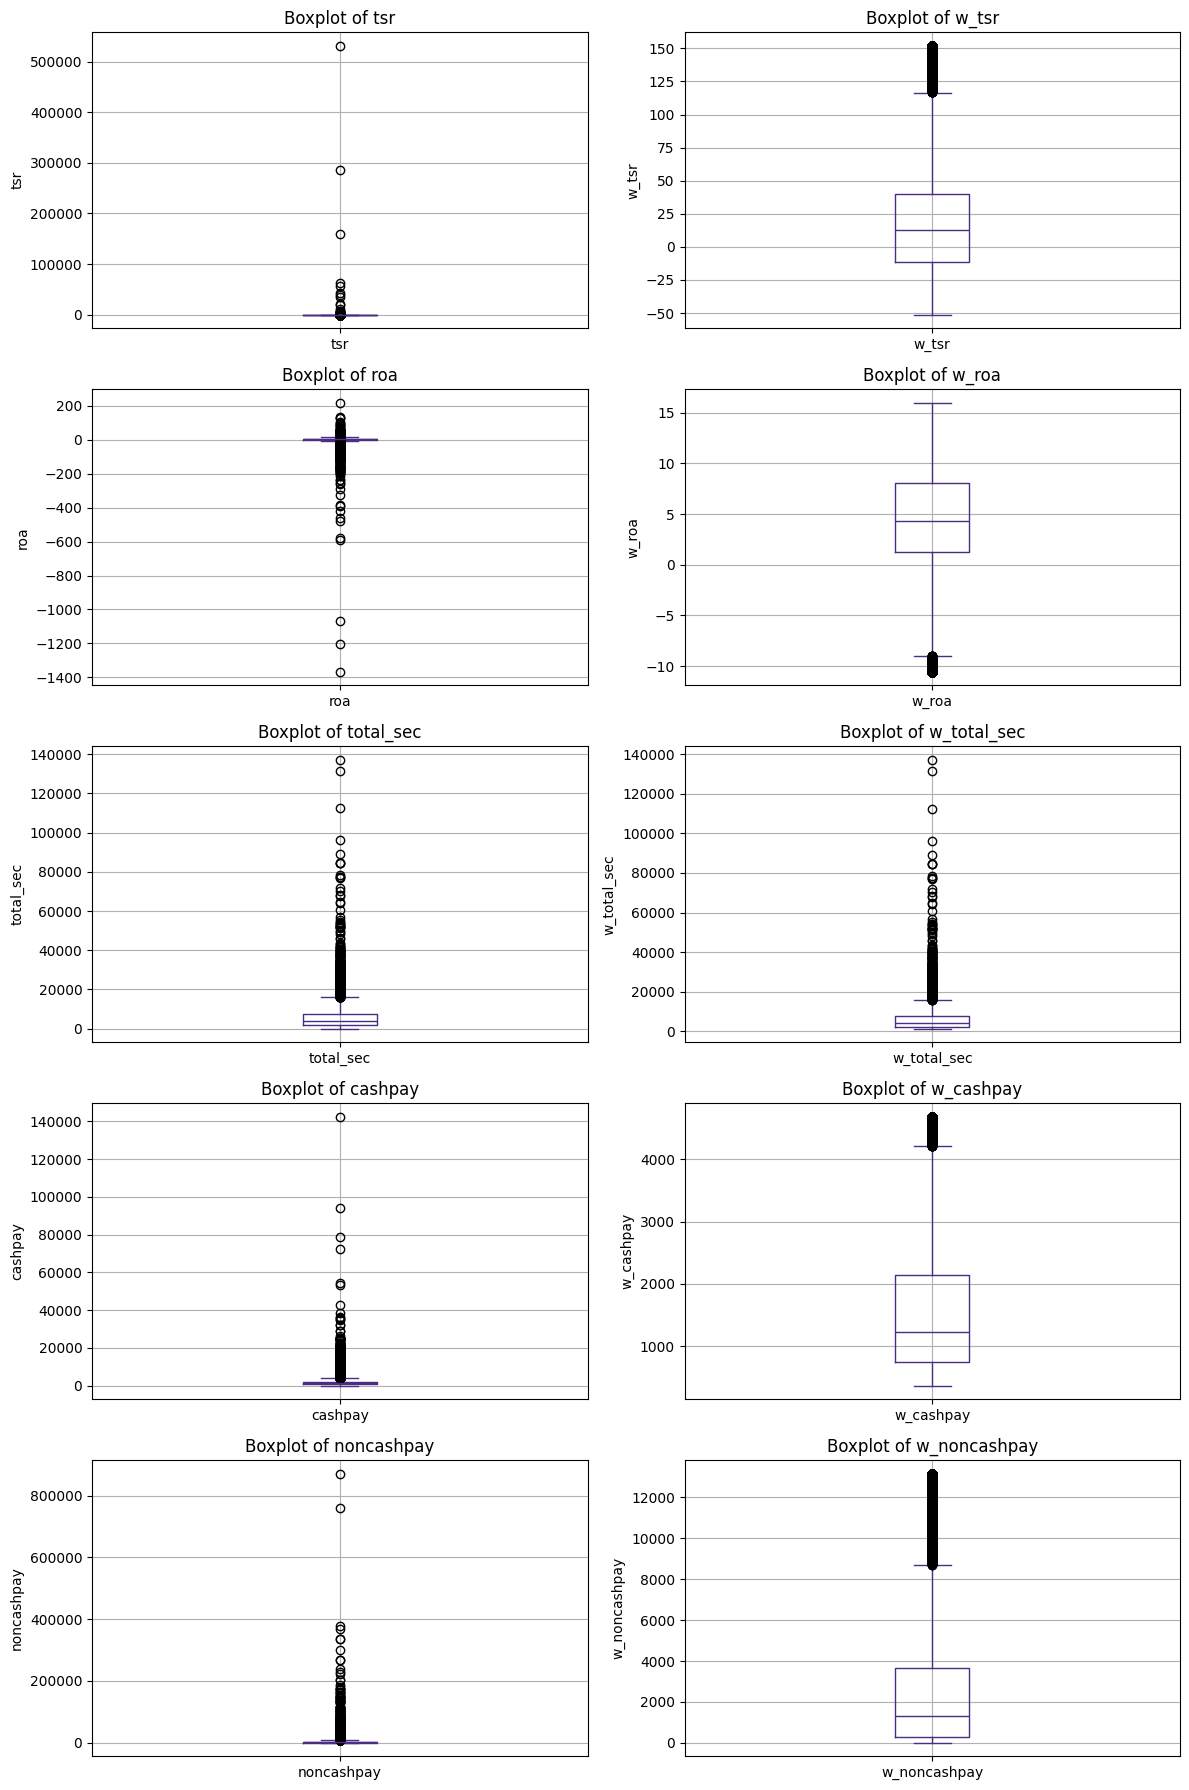

In [252]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['tsr', 'w_tsr', 'roa', 'w_roa', 'total_sec', 'w_total_sec', 'cashpay', 'w_cashpay', 'noncashpay', 'w_noncashpay']

# Set up the number of columns and rows for subplots
ncols = 2
nrows = -(-len(columns_to_plot) // ncols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 18))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each column
for i, column in enumerate(columns_to_plot):
    if column in df_total.columns:
        df_total.boxplot(column=column, ax=axes[i], color=husky_purple)
        axes[i].set_title(f"Boxplot of {column}")
        axes[i].set_ylabel(column)
    else:
        axes[i].axis('off')  # Turn off unused subplots

# Remove any unused axes
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [253]:
df_pay

# If not, replace 'CEO_ID' with the appropriate column name
df_pay['w_tsr_t2'] = df_pay.groupby('exec_fullname')['w_tsr'].shift(2)
df_pay['w_roa_t2'] = df_pay.groupby('exec_fullname')['w_roa'].shift(2)
df_pay['lnsale_t2'] = df_pay.groupby('exec_fullname')['lnsale'].shift(2)

# If not, replace 'CEO_ID' with the appropriate column name
df_pay['w_tsr_t1'] = df_pay.groupby('exec_fullname')['w_tsr'].shift(1)
df_pay['w_roa_t1'] = df_pay.groupby('exec_fullname')['w_roa'].shift(1)
df_pay['lnsale_t1'] = df_pay.groupby('exec_fullname')['lnsale'].shift(1)

# Verify the results
df_pay[['exec_fullname', 'fyear', 'tsr', 'w_tsr_t1', 'roa', 'w_roa_t1', 'lnsale', 'lnsale_t1']].head(10)


<ipython-input-253-2bdf207ef976>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pay['w_tsr_t2'] = df_pay.groupby('exec_fullname')['w_tsr'].shift(2)
<ipython-input-253-2bdf207ef976>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pay['w_roa_t2'] = df_pay.groupby('exec_fullname')['w_roa'].shift(2)
<ipython-input-253-2bdf207ef976>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

,exec_fullname,fyear,tsr,w_tsr_t1,roa,w_roa_t1,lnsale,lnsale_t1
0,Robert L. Crandall,1992,-4.255318,NaN,-2.539292,NaN,10.015876,NaN
1,Robert L. Crandall,1993,-0.740735,-4.255318,-0.496740,-2.539292,10.073153,10.015876
2,Robert L. Crandall,1994,-20.522388,-0.740735,1.170071,-0.496740,10.075261,10.073153
3,Robert L. Crandall,1995,39.436604,-20.522388,1.002250,1.170071,10.094106,10.075261
4,Robert L. Crandall,1996,18.686878,39.436604,5.391033,1.002250,10.113655,10.094106
5,Robert L. Crandall,1997,45.815605,18.686878,4.709538,5.391033,10.135962,10.113655
6,"Donald J. Carty, O.C., LL. D.",1998,-7.587541,NaN,5.855714,NaN,10.154129,NaN
7,"Donald J. Carty, O.C., LL. D.",1999,12.842103,-7.587541,2.691392,5.855714,10.052371,10.154129
8,"Donald J. Carty, O.C., LL. D.",2000,29.020325,12.842103,2.971808,2.691392,10.124824,10.052371
9,"Donald J. Carty, O.C., LL. D.",2001,-43.094097,29.020325,-5.365245,2.971808,10.058484,10.124824


# Models

In [254]:
columns_for_correlation = ["w_total_sec", "w_tsr_t1", "w_roa_t1", "ceoage",
                           "lnsale_t1", "ceotenure", "lnemp", "companyage",
                           "lncashpay", "lnnoncashpay"]

# Dropping rows with missing values in these columns
df_cleaned = df_total.dropna(subset=columns_for_correlation)

In [255]:
correlation_matrix = df_cleaned[["w_total_sec", "w_tsr_t1", "w_roa_t1", "ceoage", "lnsale_t1", "ceotenure", "lnemp", "companyage", "lncashpay", "lnnoncashpay"]].corr()

correlation_matrix

,w_total_sec,w_tsr_t1,w_roa_t1,ceoage,lnsale_t1,ceotenure,lnemp,companyage,lncashpay,lnnoncashpay
w_total_sec,1.000000,0.064014,0.087209,0.065157,0.556143,-0.012514,0.446244,0.238774,0.477843,0.519915
w_tsr_t1,0.064014,1.000000,0.208165,-0.005977,-0.024521,0.001824,-0.012347,-0.024912,0.095184,0.064095
w_roa_t1,0.087209,0.208165,1.000000,-0.000191,0.129367,0.030756,0.131721,0.013037,0.099610,0.084680
ceoage,0.065157,-0.005977,-0.000191,1.000000,0.076859,0.464824,0.053723,0.138030,0.081947,-0.007540
lnsale_t1,0.556143,-0.024521,0.129367,0.076859,1.000000,-0.096599,0.835955,0.423046,0.467549,0.461814
ceotenure,-0.012514,0.001824,0.030756,0.464824,-0.096599,1.000000,-0.070591,-0.062448,-0.032466,-0.130307
lnemp,0.446244,-0.012347,0.131721,0.053723,0.835955,-0.070591,1.000000,0.363102,0.375529,0.372515
companyage,0.238774,-0.024912,0.013037,0.138030,0.423046,-0.062448,0.363102,1.000000,0.229617,0.192155
lncashpay,0.477843,0.095184,0.099610,0.081947,0.467549,-0.032466,0.375529,0.229617,1.000000,0.386882
lnnoncashpay,0.519915,0.064095,0.084680,-0.007540,0.461814,-0.130307,0.372515,0.192155,0.386882,1.000000


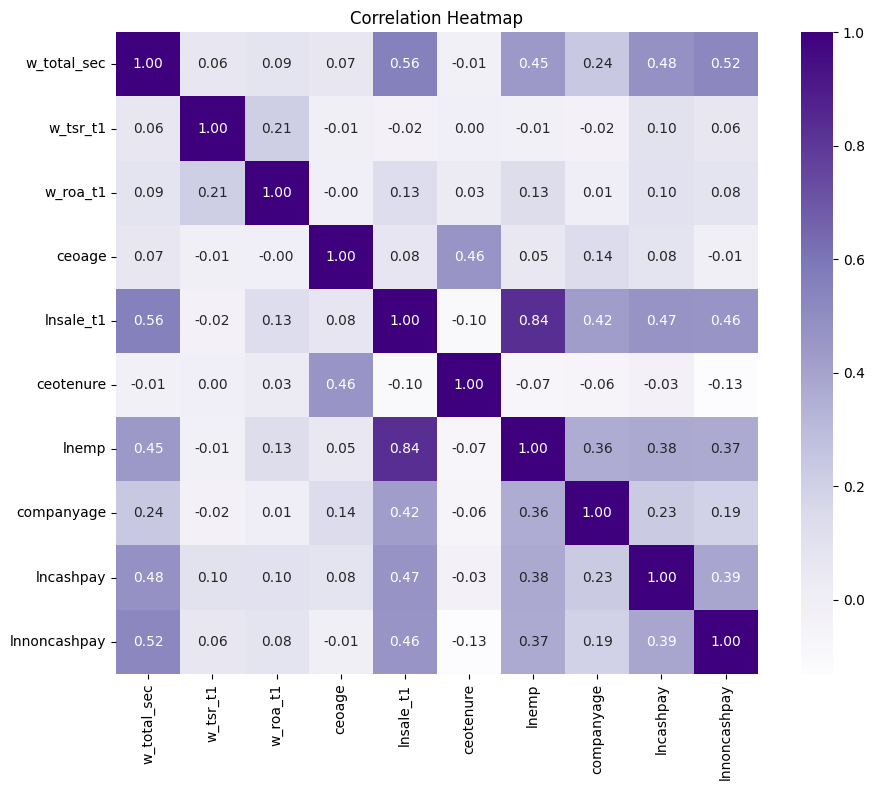

In [256]:
from statsmodels.formula.api import ols
import seaborn as sns

correlation_matrix = df_cleaned[["w_total_sec", "w_tsr_t1", "w_roa_t1", "ceoage", "lnsale_t1", "ceotenure", "lnemp", "companyage", "lncashpay", "lnnoncashpay"]].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Purples", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


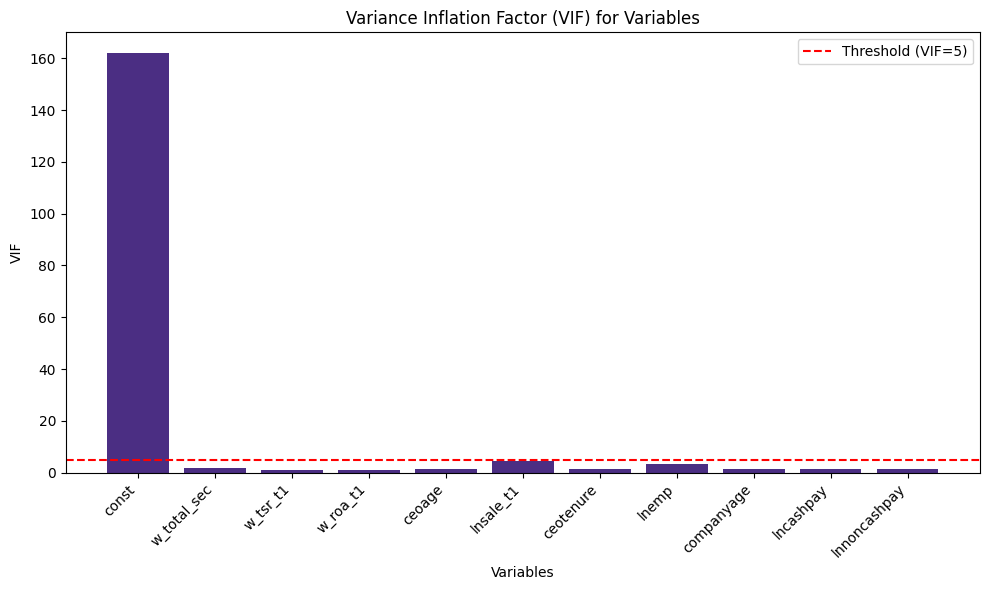

,Variable,VIF
0,const,161.942721
1,w_total_sec,1.778553
2,w_tsr_t1,1.068169
3,w_roa_t1,1.073140
4,ceoage,1.334530
5,lnsale_t1,4.314574
6,ceotenure,1.338794
7,lnemp,3.341348
8,companyage,1.249987
9,lncashpay,1.445559


In [257]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Variables for VIF calculation
X = df_cleaned[["w_total_sec", "w_tsr_t1", "w_roa_t1", "ceoage", "lnsale_t1",
              "ceotenure", "lnemp", "companyage", "lncashpay", "lnnoncashpay"]]

# Adding a constant for VIF calculation
X = sm.add_constant(X)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Visualizing VIF values
plt.figure(figsize=(10, 6))
plt.bar(vif_data["Variable"], vif_data["VIF"], color=husky_purple)
plt.axhline(y=5, color='r', linestyle='--', label='Threshold (VIF=5)')
plt.xlabel("Variables")
plt.ylabel("VIF")
plt.title("Variance Inflation Factor (VIF) for Variables")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

vif_data


In [258]:
from numpy.linalg import eig

corr_matrix = df_cleaned[["lnemp", "lnsale_t1"]].corr()
eigenvalues, _ = eig(corr_matrix)
condition_index = max(eigenvalues) / min(eigenvalues)
print("Condition Index Between lnemp and lnsales_t1:", round(condition_index, 2))


Condition Index Between lnemp and lnsales_t1: 11.19


In [259]:
df_total.to_csv("/content/cleaned_data.csv", index=False)

## Regressions

In [260]:
df_total['Gender_Female'] = np.where(df_total['Predicted_Gender_B'] == 'Male', False, True)

In [261]:
# Create dummy variables for 'final_ethnicity' without dropping the original column
dummies = pd.get_dummies(df_total['final_ethnicity'], prefix='final_ethnicity', drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_total = pd.concat([df_total, dummies], axis=1)

In [262]:

df_total = df_total.drop(columns=['final_ethnicity_White'], errors='ignore')

# Rename other ethnicity columns
ethnicity_rename_mapping = {
    'final_ethnicity_Asian': 'D_Asian',
    'final_ethnicity_Black': 'D_Black',
    'final_ethnicity_Hispanic': 'D_Hispanic',
    'final_ethnicity_Indian': 'D_Indian',
    'final_ethnicity_MiddleEastern': 'D_MiddleEastern'
}

df_total.rename(columns=ethnicity_rename_mapping, inplace=True)

df_total


,exec_fullname,co_per_rol,coname_execucomp,titleann,total_sec,total_curr,total_alt1,total_alt2,shrown_excl_opts,shrown_excl_opts_pct,...,final_ethnicity,w_total_sec,w_cashpay,w_noncashpay,Gender_Female,D_Asian,D_Black,D_Hispanic,D_Indian,D_MiddleEastern
0,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,13.000,NaN,...,White,NaN,932.715576,176.393631,False,False,False,False,False,False
1,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,600.000,NaN,NaN,6.500,NaN,...,White,NaN,905.605530,156.932388,False,False,False,False,False,False
2,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,995.000,NaN,NaN,49.070,NaN,...,White,NaN,1464.301758,1933.005005,False,False,False,False,False,False
3,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1340.900,NaN,NaN,61.000,NaN,...,White,NaN,1918.965454,4820.539062,False,False,False,False,False,False
4,Robert L. Crandall,1,AMERICAN AIRLINES GROUP INC,"chmn., pres. & CEO",NaN,1601.250,NaN,NaN,128.500,NaN,...,White,NaN,2225.829590,4324.335449,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",16254.271,700.000,16254.271,45299.742,0.000,0.000,...,Asian,16254.271,2256.040527,13155.454102,True,True,False,False,False,False
31207,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",753.040,716.346,753.040,753.040,0.000,0.000,...,Asian,1308.175,680.466309,34.856098,True,True,False,False,False,False
31208,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",31867.129,781.731,31867.129,20620.097,214.774,0.085,...,Asian,31867.129,1691.193359,13155.454102,True,True,False,False,False,False
31209,Vikram Verma,49504,8X8 INC,Chief Executive Officer and Director,4655.271,224.359,4655.271,1425.154,171.203,0.193,...,Indian,4655.271,370.746979,4147.562012,False,False,False,False,True,False


In [267]:
# simple OLS

import statsmodels.formula.api as smf

# Specify the formula in R-style
formula = 'w_total_sec ~ w_tsr_t1 + w_roa_t1 + ceoage + lnsale_t1 + ceotenure + lnemp + companyage + Gender_Female + D_Asian+ D_Black + D_Hispanic + D_Indian + D_MiddleEastern'

# Fit the model
model_r_style = smf.ols(formula=formula, data=df_total).fit()

# Display the summary
#print(model_r_style.summary())

# Generate the summary object
summary = model_r_style.summary()

# Convert the summary to a string, then split and remove Date/Time lines
summary_str = str(summary)
summary_lines = summary_str.split('\n')
filtered_lines = [line for line in summary_lines if not line.startswith("Date:") and not line.startswith("Time:")]

# Print the filtered summary
print("\n".join(filtered_lines))



                            OLS Regression Results                            
Dep. Variable:            w_total_sec   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     360.8
No. Observations:               10052   AIC:                         2.021e+05
Df Residuals:                   10038   BIC:                         2.022e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.403e+04    604.569    -23.207      0.000   -1.52e+04   -1.28e+04
Gender_Female[T.True]     194.4512    239.955      0.810      0.418    -275.908     664.810


In [268]:
# Clustered Regression

import statsmodels.formula.api as smf

# Specify the formula in R-style
formula = 'w_total_sec ~ w_tsr_t1 + w_roa_t1 + ceoage + lnsale_t1 + ceotenure + lnemp + companyage + Gender_Female + D_Asian + D_Black + D_Hispanic + D_Indian + D_MiddleEastern'

# Fit the baseline model
model_r_style = smf.ols(formula=formula, data=df_total).fit()

# Drop rows with missing values in regression variables and clustering variable
df_total_cleaned = df_total.dropna(subset=['w_total_sec', 'w_tsr_t1', 'w_roa_t1', 'ceoage',
                                           'lnsale_t1', 'ceotenure', 'lnemp', 'companyage',
                                           'Gender_Female',
                                           'D_Asian','D_Black', 'D_Hispanic',
                                           'D_Indian', 'D_MiddleEastern', 'gvkey'])

# Fit the model with clustered standard errors
model_clustered = smf.ols(formula=formula, data=df_total_cleaned).fit(
    cov_type='cluster', cov_kwds={'groups': df_total_cleaned['gvkey']}
)

#print("\nClustered Regression Model:")
#print(model_clustered.summary())

# Generate the clustered model summary as a string
clustered_summary_str = str(model_clustered.summary())

# Filter out lines with Date and Time
clustered_summary_lines = clustered_summary_str.split('\n')
filtered_clustered_summary = [line for line in clustered_summary_lines if not line.startswith("Date:") and not line.startswith("Time:")]

# Print the filtered summary
print("\nClustered Regression Model:")

print("\n".join(filtered_clustered_summary))


Clustered Regression Model:
                            OLS Regression Results                            
Dep. Variable:            w_total_sec   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     61.85
No. Observations:               10052   AIC:                         2.021e+05
Df Residuals:                   10038   BIC:                         2.022e+05
Df Model:                          13                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.403e+04   1251.423    -11.211      0.000   -1.65e+04   -1.16e+04
Gender_Female[T.True]     194.4512    415.563      0.468      0

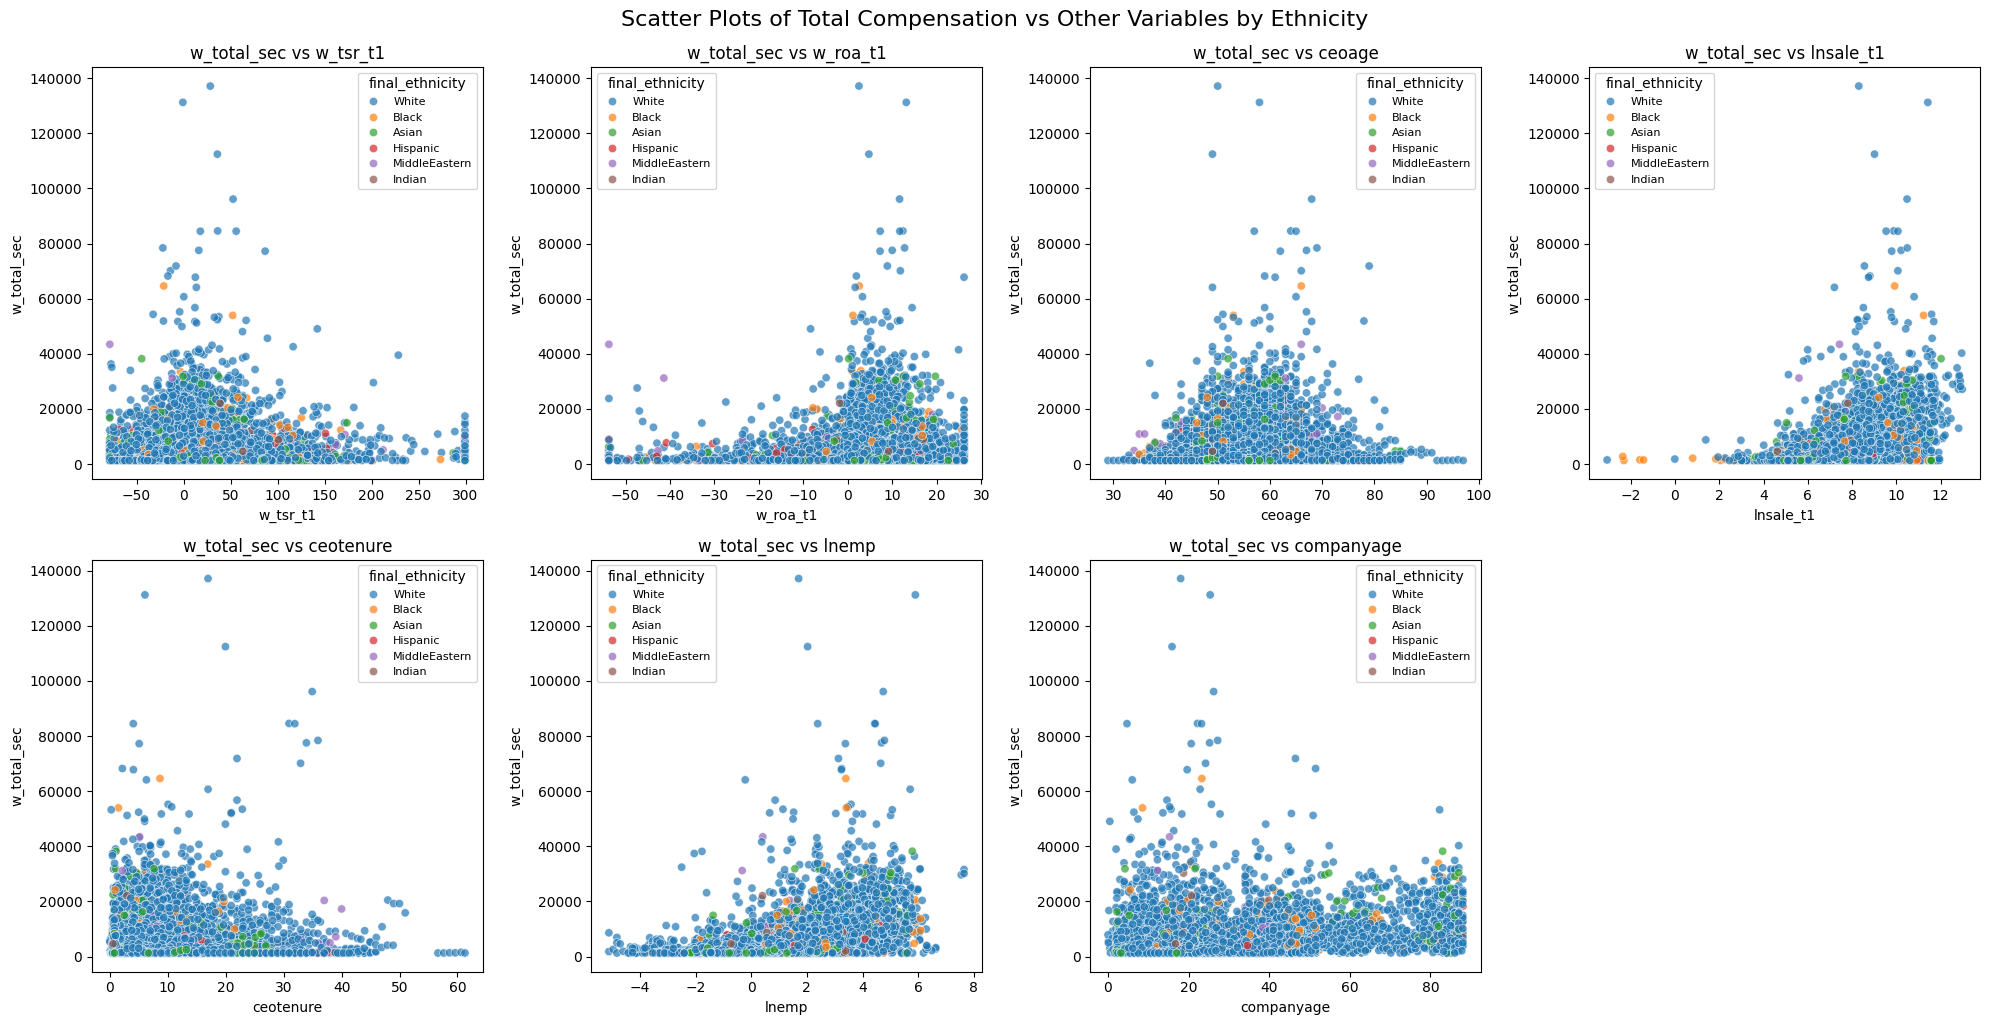

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables
y = 'w_total_sec'
x_variables = ['w_tsr_t1', 'w_roa_t1', 'ceoage', 'lnsale_t1', 'ceotenure', 'lnemp', 'companyage']
hue = 'final_ethnicity'

# Create a 4x2 grid of scatter plots for y vs each x_variable
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False, sharex=False)
axes = axes.flatten()  # Flatten to easily loop over axes

# Loop through x variables to plot on each subplot
for i, x in enumerate(x_variables):
    sns.scatterplot(
        data=df_total_cleaned,
        x=x,
        y=y,
        hue=hue,
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f"{y} vs {x}", fontsize=12)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].legend(title=hue, loc='best', fontsize=8)

# Hide any unused subplots if x_variables < 8
for j in range(len(x_variables), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.suptitle("Scatter Plots of Total Compensation vs Other Variables by Ethnicity", y=1.02, fontsize=16)
plt.show()


In [281]:
! pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.8 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=acef423515102352705ce7060e1ec39889ba5c22c7060d73651bcbf4c1703498
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [284]:
df_total_cleaned

,exec_fullname,co_per_rol,coname_execucomp,titleann,total_sec,total_curr,total_alt1,total_alt2,shrown_excl_opts,shrown_excl_opts_pct,...,final_ethnicity,w_total_sec,w_cashpay,w_noncashpay,Gender_Female,D_Asian,D_Black,D_Hispanic,D_Indian,D_MiddleEastern
88,John B. Hess,79,HESS CORP,chairman & CEO,15010.133,2497.978,16457.440,6942.880,36775.128906,11.544,...,White,15010.133,4677.203125,10307.561523,False,False,False,False,False,False
89,John B. Hess,79,HESS CORP,chairman & CEO,17737.752,2574.367,17737.752,50350.755,34551.453125,10.651,...,White,17737.752,4677.203125,9587.509766,False,False,False,False,False,False
90,John B. Hess,79,HESS CORP,chairman & CEO,26334.067,2468.333,26334.067,159566.940,34509.503906,10.517,...,White,26334.067,4677.203125,13155.454102,False,False,False,False,False,False
91,John B. Hess,79,HESS CORP,Chairman of the Board and Chief Executive Officer,18950.608,2501.333,18950.608,15987.347,29403.945312,9.039,...,White,18950.608,4677.203125,8455.489258,False,False,False,False,False,False
92,John B. Hess,79,HESS CORP,Chairman of the Board and Chief Executive Officer,18188.947,2640.327,18188.947,14683.661,28460.039062,8.500,...,White,18188.947,4677.203125,8448.286133,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",16254.271,700.000,16254.271,45299.742,0.000000,0.000,...,Asian,16254.271,2256.040527,13155.454102,True,True,False,False,False,False
31207,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",753.040,716.346,753.040,753.040,0.000000,0.000,...,Asian,1308.175,680.466309,34.856098,True,True,False,False,False,False
31208,Hock E. Tan,49437,AVAGO TECHNOLOGIES LTD,"Chief Executive Officer, President and Executi...",31867.129,781.731,31867.129,20620.097,214.774000,0.085,...,Asian,31867.129,1691.193359,13155.454102,True,True,False,False,False,False
31209,Vikram Verma,49504,8X8 INC,Chief Executive Officer and Director,4655.271,224.359,4655.271,1425.154,171.203000,0.193,...,Indian,4655.271,370.746979,4147.562012,False,False,False,False,True,False


In [290]:
unique_exec_count = df_total_cleaned.groupby("ethnicity_recode")['exec_fullname'].nunique()

unique_exec_count

,exec_fullname
ethnicity_recode,
Asian,54
Black,19
Hispanic,12
Indian,5
MiddleEastern,4
Unknown,628
White,1588


In [172]:
# Check for missing values in the dataset
missing_values = df_total.isnull().sum()

# Ensure the lengths of the data and the clustering variable are the same
print("Regression data shape:", df_total.shape)
print("Grouping variable shape:", df_total['gvkey'].shape)

Regression data shape: (31211, 398)
Grouping variable shape: (31211,)
